# Data Visualization for CHSH-Breaking Channels

This notebook analyzes and plots data produced by the following scripts:
* script/chsh-breaking_amplitude_damping.py
* script/chsh-breaking_depolarizing.py

In [1]:
from context import QNetOptimizer as QNopt
import matplotlib.pyplot as plt
from pennylane import numpy as np
import json

from os import listdir
from os.path import isfile, join
import re

In [2]:
def analyze_data_files(data_files):
    data_dicts = []
    for filepath in data_files:
        with open(filepath) as file:
            data_dicts.append(json.load(file))
    
    results = {}
    noise_params = []
    for data_dict in data_dicts:
        for i in range(len(data_dict["noise_params"])):
            if np.isnan(data_dict["max_scores"][i]):
                continue
            
            noise_key = "{:.2f}".format(data_dict["noise_params"][i])
            
            if noise_key in results:
                results[noise_key].append(data_dict["max_scores"][i])
            else:
                results[noise_key] = [data_dict["max_scores"][i]]
                noise_params.append(np.round(data_dict["noise_params"][i],5))
    
    sorted_noise_params = np.sort(noise_params)
    max_scores = [
        max(results["{:.2f}".format(noise_param)])
        for noise_param in sorted_noise_params
    ]
    mean_scores = [
        np.mean(results["{:.2f}".format(noise_param)], axis=0)
        for noise_param in sorted_noise_params
    ]
    std_errs = [
        np.std(results[noise_key], axis=0) / np.sqrt(len(results[noise_key]))
        for noise_key in ["{:.2f}".format(noise_param) for noise_param in sorted_noise_params]
    ]
    
    
    return sorted_noise_params, max_scores, mean_scores, std_errs          

## Depolarizing Channel

In [3]:
max_entangled_dep_path = "../../script/data/chsh-breaking_depolarizing/max_entangled/"
max_entangled_dep_files = [
    join(max_entangled_dep_path, f) for f in listdir(max_entangled_dep_path) if (
        f.endswith(".json") and isfile(join(max_entangled_dep_path, f))
    )
]
print("num max entangled files : ", len(max_entangled_dep_files))

rot_cnot_rot_dep_path = "../../script/data/chsh-breaking_depolarizing/rot_cnot_rot/"
rot_cnot_rot_dep_files = [
    join(rot_cnot_rot_dep_path, f) for f in listdir(rot_cnot_rot_dep_path) if (
        f.endswith(".json") and isfile(join(rot_cnot_rot_dep_path, f))
    )
]
print("num rot_cnot_rot files : ", len(rot_cnot_rot_dep_files))

arb_dep_path = "../../script/data/chsh-breaking_depolarizing/arbitrary/"
arb_dep_files = [
    join(arb_dep_path, f) for f in listdir(arb_dep_path) if (
        f.endswith(".json") and isfile(join(arb_dep_path, f))
    )
]
print("num arbitrary files : ", len(arb_dep_files))

ent_noise_params_dep, ent_max_scores_dep, ent_mean_scores_dep, ent_std_errs_dep = analyze_data_files(max_entangled_dep_files)
arb_noise_params_dep, arb_max_scores_dep, arb_mean_scores_dep, arb_std_errs_dep = analyze_data_files(arb_dep_files)
rot_noise_params_dep, rot_max_scores_dep, rot_mean_scores_dep, rot_std_errs_dep = analyze_data_files(rot_cnot_rot_dep_files)

num max entangled files :  7
num rot_cnot_rot files :  7
num arbitrary files :  6


## Amplitude Damping Channel

In [4]:
max_entangled_amp_path = "../../script/data/chsh-breaking_amplitude_damping/max_entangled/"
max_entangled_amp_files = [
    join(max_entangled_amp_path, f) for f in listdir(max_entangled_amp_path) if (
        f.endswith(".json") and isfile(join(max_entangled_amp_path, f))
    )
]
print("num max entangled files : ", len(max_entangled_amp_files))

rot_cnot_rot_amp_path = "../../script/data/chsh-breaking_amplitude_damping/rot_cnot_rot/"
rot_cnot_rot_amp_files = [
    join(rot_cnot_rot_amp_path, f) for f in listdir(rot_cnot_rot_amp_path) if (
        f.endswith(".json") and isfile(join(rot_cnot_rot_amp_path, f))
    )
]
print("num rot_cnot_rot files : ", len(rot_cnot_rot_amp_files))


arb_amp_path = "../../script/data/chsh-breaking_amplitude_damping/arbitrary/"
arb_amp_files = [
    join(arb_amp_path, f) for f in listdir(arb_amp_path) if (
        f.endswith(".json") and isfile(join(arb_amp_path, f))
    )
]
print("num arbitrary files : ", len(arb_amp_files))

ent_noise_params_amp, ent_max_scores_amp, ent_mean_scores_amp, ent_std_errs_amp = analyze_data_files(max_entangled_amp_files)
arb_noise_params_amp, arb_max_scores_amp, arb_mean_scores_amp, arb_std_errs_amp = analyze_data_files(arb_amp_files)
rot_noise_params_amp, rot_max_scores_amp, rot_mean_scores_amp, rot_std_errs_amp = analyze_data_files(rot_cnot_rot_amp_files)

num max entangled files :  13
num rot_cnot_rot files :  13
num arbitrary files :  11


## Visualization CHSH Score

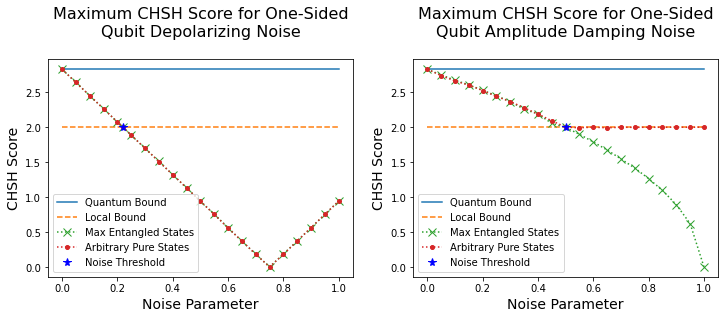

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

ax1.plot(ent_noise_params_dep, [2*np.sqrt(2)]*len(ent_noise_params_dep), label="Quantum Bound")
ax1.plot(ent_noise_params_dep, [2]*len(ent_noise_params_dep), "--", label="Local Bound")

ax1.plot(ent_noise_params_dep, ent_max_scores_dep, ":x", markersize=8, label="Max Entangled States")
# plt.errorbar(ent_noise_params, ent_mean_scores, ent_std_errs,linestyle="--", label="CHSH noise ")

ax1.plot(arb_noise_params_dep, arb_max_scores_dep, ":.", markersize=8, label="Arbitrary Pure States")
# plt.errorbar(arb_noise_params, arb_mean_scores, arb_std_errs,linestyle="--", label="CHSH noise ")

# plt.plot(rot_noise_params, rot_max_scores, label="max scores")
# plt.errorbar(rot_noise_params, rot_mean_scores, rot_std_errs,linestyle="--", label="CHSH noise ")

ax1.plot([(1-1/np.sqrt(2))*3/4], [2], "b*", markersize=8, label="Noise Threshold")
# ax1.plot([3/4], [0], "b*", markersize=8, label="Completely Depolarized")
ax1.plot()
ax1.set_title("Maximum CHSH Score for One-Sided\nQubit Depolarizing Noise\n", size=16)
ax1.set_ylabel("CHSH Score", size=14)
ax1.set_xlabel("Noise Parameter", size=14)
ax1.legend()

ax2.plot(ent_noise_params_amp, [2*np.sqrt(2)]*len(ent_noise_params_amp), label="Quantum Bound")
ax2.plot(ent_noise_params_amp, [2]*len(ent_noise_params_amp), "--", label="Local Bound")

ax2.plot(ent_noise_params_amp, ent_max_scores_amp, ":x", markersize=8, label="Max Entangled States")
# plt.errorbar(ent_noise_params, ent_mean_scores, ent_std_errs,linestyle="--", label="CHSH noise ")

ax2.plot(arb_noise_params_amp, arb_max_scores_amp, ":.", markersize=8, label="Arbitrary Pure States")
# plt.errorbar(arb_noise_params, arb_mean_scores, arb_std_errs,linestyle="--", label="CHSH noise ")

# plt.plot(rot_noise_params, rot_max_scores, label="max scores")
# plt.errorbar(rot_noise_params, rot_mean_scores, rot_std_errs,linestyle="--", label="CHSH noise ")

ax2.plot([0.5], [2], "b*", markersize=8, label="Noise Threshold")
ax2.plot()
ax2.set_title("Maximum CHSH Score for One-Sided\nQubit Amplitude Damping Noise\n", size=16)
ax2.set_ylabel("CHSH Score", size=14)
ax2.set_xlabel("Noise Parameter", size=14)
# ax1.plot(ent_noise_params_amp, [2*np.sqrt(2*(1-p)) for p in ent_noise_params_amp])  # line of best fit
ax2.legend()


plt.show()

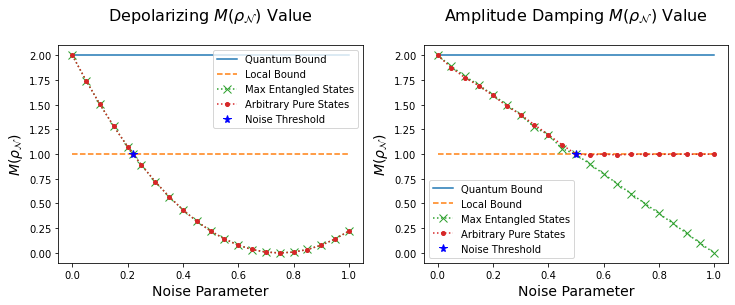

In [6]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

ax1.plot(ent_noise_params_dep, [2]*len(ent_noise_params_dep), label="Quantum Bound")
ax1.plot(ent_noise_params_dep, [1]*len(ent_noise_params_dep), "--" , label="Local Bound")
ax1.plot(ent_noise_params_dep, [(x/2)**2 for x in ent_max_scores_dep], ":x", markersize=8, label="Max Entangled States")
ax1.plot(ent_noise_params_dep, [(x/2)**2 for x in arb_max_scores_dep], ":.", markersize=8, label="Arbitrary Pure States")
ax1.set_title(r"Depolarizing $M(\rho_{\mathcal{N}})$ Value" + "\n", size=16)
ax1.set_ylabel(r"$M(\rho_{\mathcal{N}})$", size=14)
ax1.set_xlabel("Noise Parameter", size=14)
ax1.plot([(1-1/np.sqrt(2))*3/4], [1], "b*", markersize=8, label="Noise Threshold")
ax1.legend(loc="upper right")


ax2.plot(ent_noise_params_amp, [2]*len(ent_noise_params_amp), label="Quantum Bound")
ax2.plot(ent_noise_params_amp, [1]*len(ent_noise_params_amp), "--" , label="Local Bound")
ax2.plot(ent_noise_params_amp, [(x/2)**2 for x in ent_max_scores_amp], ":x", markersize=8, label="Max Entangled States")
ax2.plot(ent_noise_params_amp, [(x/2)**2 for x in arb_max_scores_amp], ":.", markersize=8, label="Arbitrary Pure States")
ax2.set_title(r"Amplitude Damping $M(\rho_{\mathcal{N}})$ Value" + "\n", size=16)
ax2.set_ylabel(r"$M(\rho_{\mathcal{N}})$", size=14)
ax2.set_xlabel("Noise Parameter", size=14)
ax2.plot([0.5], [1], "b*", markersize=8, label="Noise Threshold")
ax2.legend()

plt.show()